# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.latex.preamble']= r"\usepackage{lmodern}"
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params)

In [2]:
from measures import lts_measure
from misc_func import generate_state_seq
from postprocessing import find_projection

In [3]:
l = 60 # length of the recording in seconds
true_jumps = [5.0, 15.0, 30.0, 40.0, 55.0]
true_states = [1, 2, 3, 2, 3, 1]

# Simulation study

## Small $\mu_2$

In [8]:
# parameters of the LTS measure
w = 0.6
sigma = 0.35
lam = 0.0001
zeta = 0.5

gamma = 0.5 # parameter of post-processing

# parameters of the generated state sequence
mu_1 = 0.1
mu_2_array = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

big_table = []

for mu_2 in mu_2_array:
    accuracy_table = []
    measure_table_est = []
    measure_table_est_no_penalty = []
    measure_table_pp = []
    for loop_idx in range(2):
        jumps, states, accuracy = generate_state_seq(mu_1, mu_2)
        pp_jumps, pp_states = find_projection(jumps, states, gamma)

        lts_est_current = lts_measure(true_jumps, true_states, jumps, states, l, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(true_jumps, true_states, pp_jumps[1:-1], pp_states, l, w, sigma, lam, zeta)

        accuracy_table.append(round(accuracy, 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([mu_2, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

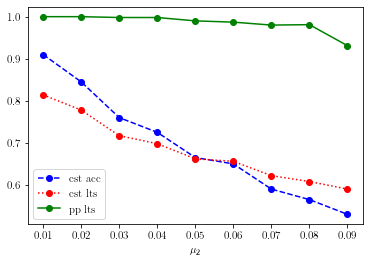

In [9]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['mu', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['mu'], bt_df['est_accuracy'], '--bo', label = 'est acc')
plt.plot(bt_df['mu'], bt_df['est_lts'], ':ro', label = 'est lts')
plt.plot(bt_df['mu'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\mu_2$')
plt.savefig('fig3.jpg', dpi = 600)
plt.show()

## Big $\mu_2$

In [20]:
# parameters of the generated state sequence
mu_1 = 1
mu_2_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

big_table = []

for mu_2 in mu_2_array:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        jumps, states, accuracy = generate_state_seq(mu_1, mu_2)
        pp_jumps, pp_states = find_projection(jumps, states, gamma)

        lts_est_current = lts_measure(true_jumps, true_states, jumps, states, l, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(true_jumps, true_states, pp_jumps[1:-1], pp_states, l, w, sigma, lam, zeta)

        accuracy_table.append(round(accuracy, 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([mu_2,
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

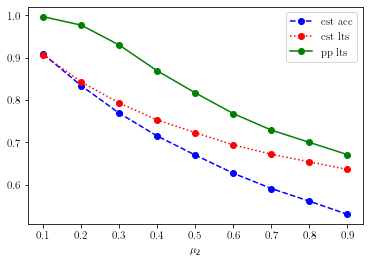

In [22]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['mu', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['mu'], bt_df['est_accuracy'], '--bo', label = 'est acc')
plt.plot(bt_df['mu'], bt_df['est_lts'], ':ro', label = 'est lts')
plt.plot(bt_df['mu'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\mu_2$')
plt.savefig('fig4.jpg', dpi = 600)
plt.show()

## $\gamma$

In [81]:
jumps_array = []
states_array = []
accuracy_array = []
mu_1 = 0.1
mu_2 = 0.08

for loop_idx in range(1000):
    jumps, states, accuracy = generate_state_seq(mu_1, mu_2)
    
    jumps_array.append(jumps)
    states_array.append(states)
    accuracy_array.append(accuracy)

In [34]:
# parameter of the post-processing
gammas = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 2.5]

big_table = []

accuracy_table = []
measure_dict_est = dict()
measure_dict_pp = dict()
for gamma in gammas:
    measure_dict_est[gamma] = []
    measure_dict_pp[gamma] = []

for loop_idx in range(1000):
    jumps = jumps_array[loop_idx]
    states = states_array[loop_idx]
    accuracy = accuracy_array[loop_idx]
    accuracy_table.append(round(accuracy, 2))

    pp_jumps, pp_states = find_projection(jumps, states, gamma)
    
    for gamma in gammas:
        lts_est_current = lts_measure(true_jumps, true_states, jumps, states, l, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(true_jumps, true_states, pp_jumps[1:-1], pp_states, l, w, sigma, lam, zeta)

        measure_dict_est[gamma].append(round(lts_est_current, 3))
        measure_dict_pp[gamma].append(round(lts_pp_current, 3))

for gamma in gammas:
    big_table.append([gamma, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_dict_est[gamma]), 3),
                      round(np.mean(measure_dict_pp[gamma]), 3)])

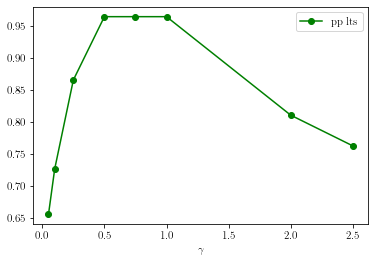

mean accuracy of noisy labels:  0.535
mean lts measure of noisy labels:  0.588


In [35]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['gamma', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['gamma'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\gamma$')
plt.savefig('fig5.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))
print('mean lts measure of noisy labels: ', np.mean(bt_df['est_lts']))

## $w$

In [ ]:
ws = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2]

gamma = 0.5 # parameter of post-processing

big_table = []

accuracy_table = []
measure_dict_est = dict()
measure_dict_pp = dict()
for w in ws:
    measure_dict_est[w] = []
    measure_dict_pp[w] = []

for loop_idx in range(1000):
    jumps = jumps_array[loop_idx]
    states = states_array[loop_idx]
    accuracy = accuracy_array[loop_idx]
    accuracy_table.append(round(accuracy, 2))

    pp_jumps, pp_states = find_projection(jumps, states, gamma)
    
    for w in ws:
        lts_est_current = lts_measure(true_jumps, true_states, jumps, states, l, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(true_jumps, true_states, pp_jumps[1:-1], pp_states, l, w, sigma, lam, zeta)

        measure_dict_est[w].append(round(lts_est_current, 3))
        measure_dict_pp[w].append(round(lts_pp_current, 3))

for w in ws:
    big_table.append([w, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_dict_est[w]), 3),
                      round(np.mean(measure_dict_pp[w]), 3)])

In [ ]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['w', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['w'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$w$')
plt.savefig('fig6.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))

## $\lambda$

In [70]:
jumps_array = []
states_array = []
accuracy_array = []
mu_1 = 1
mu_2 = 0.8

for loop_idx in range(1000):
    jumps, states, accuracy = generate_state_seq(mu_1, mu_2)
    
    jumps_array.append(jumps)
    states_array.append(states)
    accuracy_array.append(accuracy)

In [71]:
w = 0.6
lambdas = [0, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 
           0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 
           0.08, 0.09, 0.1]

big_table = []


accuracy_table = []
measure_dict_est = dict()
measure_dict_pp = dict()
for lam in lambdas:
    measure_dict_est[lam] = []
    measure_dict_pp[lam] = []

for loop_idx in range(1000):
    jumps = jumps_array[loop_idx]
    states = states_array[loop_idx]
    accuracy = accuracy_array[loop_idx]
    accuracy_table.append(round(accuracy, 2))

    pp_jumps, pp_states = find_projection(jumps, states, gamma)
    
    for lam in lambdas:
        lts_est_current = lts_measure(true_jumps, true_states, jumps, states, l, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(true_jumps, true_states, pp_jumps[1:-1], pp_states, l, w, sigma, lam, zeta)

        measure_dict_est[lam].append(round(lts_est_current, 3))
        measure_dict_pp[lam].append(round(lts_pp_current, 3))

for lam in lambdas:
    big_table.append([lam, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_dict_est[lam]), 3),
                      round(np.mean(measure_dict_pp[lam]), 3)])

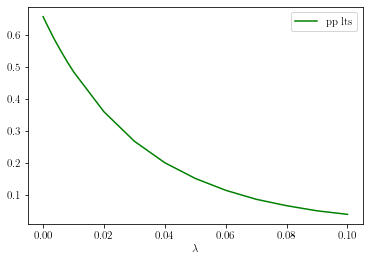

mean accuracy of noisy labels:  0.5600000000000003


In [72]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['lambda', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['lambda'], bt_df['est_lts'], '-g', label = 'pp lts')
plt.legend()
plt.xlabel('$\lambda$')
plt.savefig('fig7.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))